# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [2]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json

from IPython.display import HTML

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [3]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
url_base = 'http://prodtec-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2023-06-02T10:00:00Z'
endTime = '2023-09-01T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [4]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

In [5]:
allbasins_n2 = pd.read_csv(f'cuencas_nombres.csv')

In [6]:
allbasins_n2

,codcuenca,nombre
0,10,RÍO CUAREIM
1,11,RÍO URUGUAY entre Río Cuareim y Río Arapey
2,12,RÍO ARAPEY CHICO
3,13,RÍO ARAPEY GRANDE
4,14,RÍO URUGUAY entre Río Arapey y Río Dayman
5,15,RÍO DAYMAN
6,16,RÍO URUGUAY entre Río Dayman y Río Queguay
7,17,RÍO QUEGUAY GRANDE
8,18,RÍO URUGUAY entre Río Queguay y Río Negro
9,19,RÍO URUGUAY entre Río Negro y Río de la Plata


In [7]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
df.set_index('FECHA')
df.sort_index(ascending=True)
display(df.tail(20))

,FECHA,10,11,12,13,14,15,16,17,18,...,58,60,61,62,63,64,65,66,67,68
72,2023-08-12 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,2023-08-13 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,2023-08-14 07:00:00,0,0,0,0,0,0,0.18,0.17,0.05,...,0,0,0,0,0,0,0,0,0,0
75,2023-08-15 07:00:00,0.18,0,0.24,0.38,0,0.24,0,0.1,0,...,0.01,0,0,0,0,0,0,0,0,0
76,2023-08-16 07:00:00,0.21,0,0.01,0.01,0,0,0.53,0.51,1.19,...,2,16.5,5.49,18.46,38.41,37.07,16.2,70.44,65.8,57.62
77,2023-08-17 07:00:00,50.78,45.11,41.59,33.15,15.32,17.3,11.51,21.87,21.6,...,37,71.55,63.27,66.76,57.92,62.21,53.9,72.13,76.09,68.15
78,2023-08-18 07:00:00,1.95,0.15,0.22,0.88,0.02,2.06,0.7,1.51,0.95,...,0.57,5.34,4.31,3.33,3.97,5.36,4.94,4.18,3.62,3.84
79,2023-08-19 07:00:00,0.11,0.06,0.16,0,0,0,0,0,0,...,0,0.06,0.04,0,0.09,0.05,0.01,0.18,0.43,0.9
80,2023-08-20 07:00:00,0.05,0,0,0,0,0,0,0,0,...,0,0.02,0,0,0,0,0,0,0,0
81,2023-08-21 07:00:00,0.53,0,0,0,0,0,0,0,0.11,...,1.03,11.46,15.46,17.28,11.95,10.68,18.05,8.05,14.6,18.73


In [8]:
cols = ['FECHA','63','67','28','52','45','42','40','31','33','32','30','12','13','44','10','15','27','29','24','22','26','20','58','55','54','57','50','43','17','23','65','21','61','64','68','66','62','60','53','51','41','14','11','16','19','18','56']
df = df[cols]

In [8]:
df.to_clipboard(index=False)

In [9]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.tail(10))

FECHA,2023-08-01 07:00:00,2023-08-02 07:00:00,2023-08-03 07:00:00,2023-08-04 07:00:00,2023-08-05 07:00:00,2023-08-06 07:00:00,2023-08-07 07:00:00,2023-08-08 07:00:00,2023-08-09 07:00:00,2023-08-10 07:00:00,...,2023-08-22 07:00:00,2023-08-23 07:00:00,2023-08-24 07:00:00,2023-08-25 07:00:00,2023-08-26 07:00:00,2023-08-27 07:00:00,2023-08-28 07:00:00,2023-08-29 07:00:00,2023-08-30 07:00:00,2023-08-31 07:00:00
58,0.00,0.0,0.0,0.00,0.00,0.31,0.0,0.00,0.00,0.00,...,0.36,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
60,0.01,0.0,0.0,0.00,0.34,0.37,0.0,0.02,0.15,0.02,...,5.10,0.01,0.00,0.0,0.0,0.02,0.02,0.00,0.03,0.02
61,0.00,0.0,0.0,0.00,0.36,0.05,0.0,0.00,0.00,0.00,...,2.93,0.02,0.00,0.0,0.0,0.01,0.00,0.00,0.00,0.00
62,0.00,0.0,0.0,0.00,0.38,0.23,0.0,0.04,0.00,0.00,...,0.13,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
63,0.00,0.0,0.0,0.01,0.36,1.77,0.0,0.09,0.00,0.00,...,0.12,0.00,0.12,0.0,0.0,0.00,0.00,0.01,0.00,0.00
64,0.00,0.0,0.0,0.03,0.45,1.60,0.0,0.08,0.00,0.00,...,0.17,0.00,0.00,0.0,0.0,0.00,0.00,0.03,0.00,0.00
65,0.00,0.0,0.0,0.00,0.28,0.59,0.0,0.00,0.00,0.05,...,0.18,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
66,0.00,0.0,0.0,0.09,0.01,0.53,0.0,0.09,0.00,0.00,...,0.10,0.00,0.00,0.0,0.0,0.00,0.00,0.09,0.00,0.00
67,0.00,0.0,0.0,0.05,0.00,0.50,0.0,0.05,0.00,0.00,...,0.12,0.00,0.08,0.0,0.0,0.00,0.00,0.05,0.00,0.00
68,0.00,0.0,0.0,0.01,0.00,0.41,0.0,0.01,0.00,0.00,...,0.19,0.00,0.00,0.0,0.0,0.00,0.00,0.01,0.00,0.00


In [10]:
piv2 = piv.transpose()
HTML(piv2.tail(2).to_html())

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,40,41,42,43,44,45,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,66,67,68
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-08-30 07:00:00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.05,0.03,0.0,0.01,0.01,0.0,0.05,0.03,0.01,0.0,0.04,0.06,0.09,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-31 07:00:00,0.43,1.86,0.0,0.02,0.75,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.01,0.00,0.0,0.04,0.00,0.00,0.0,0.00,0.01,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


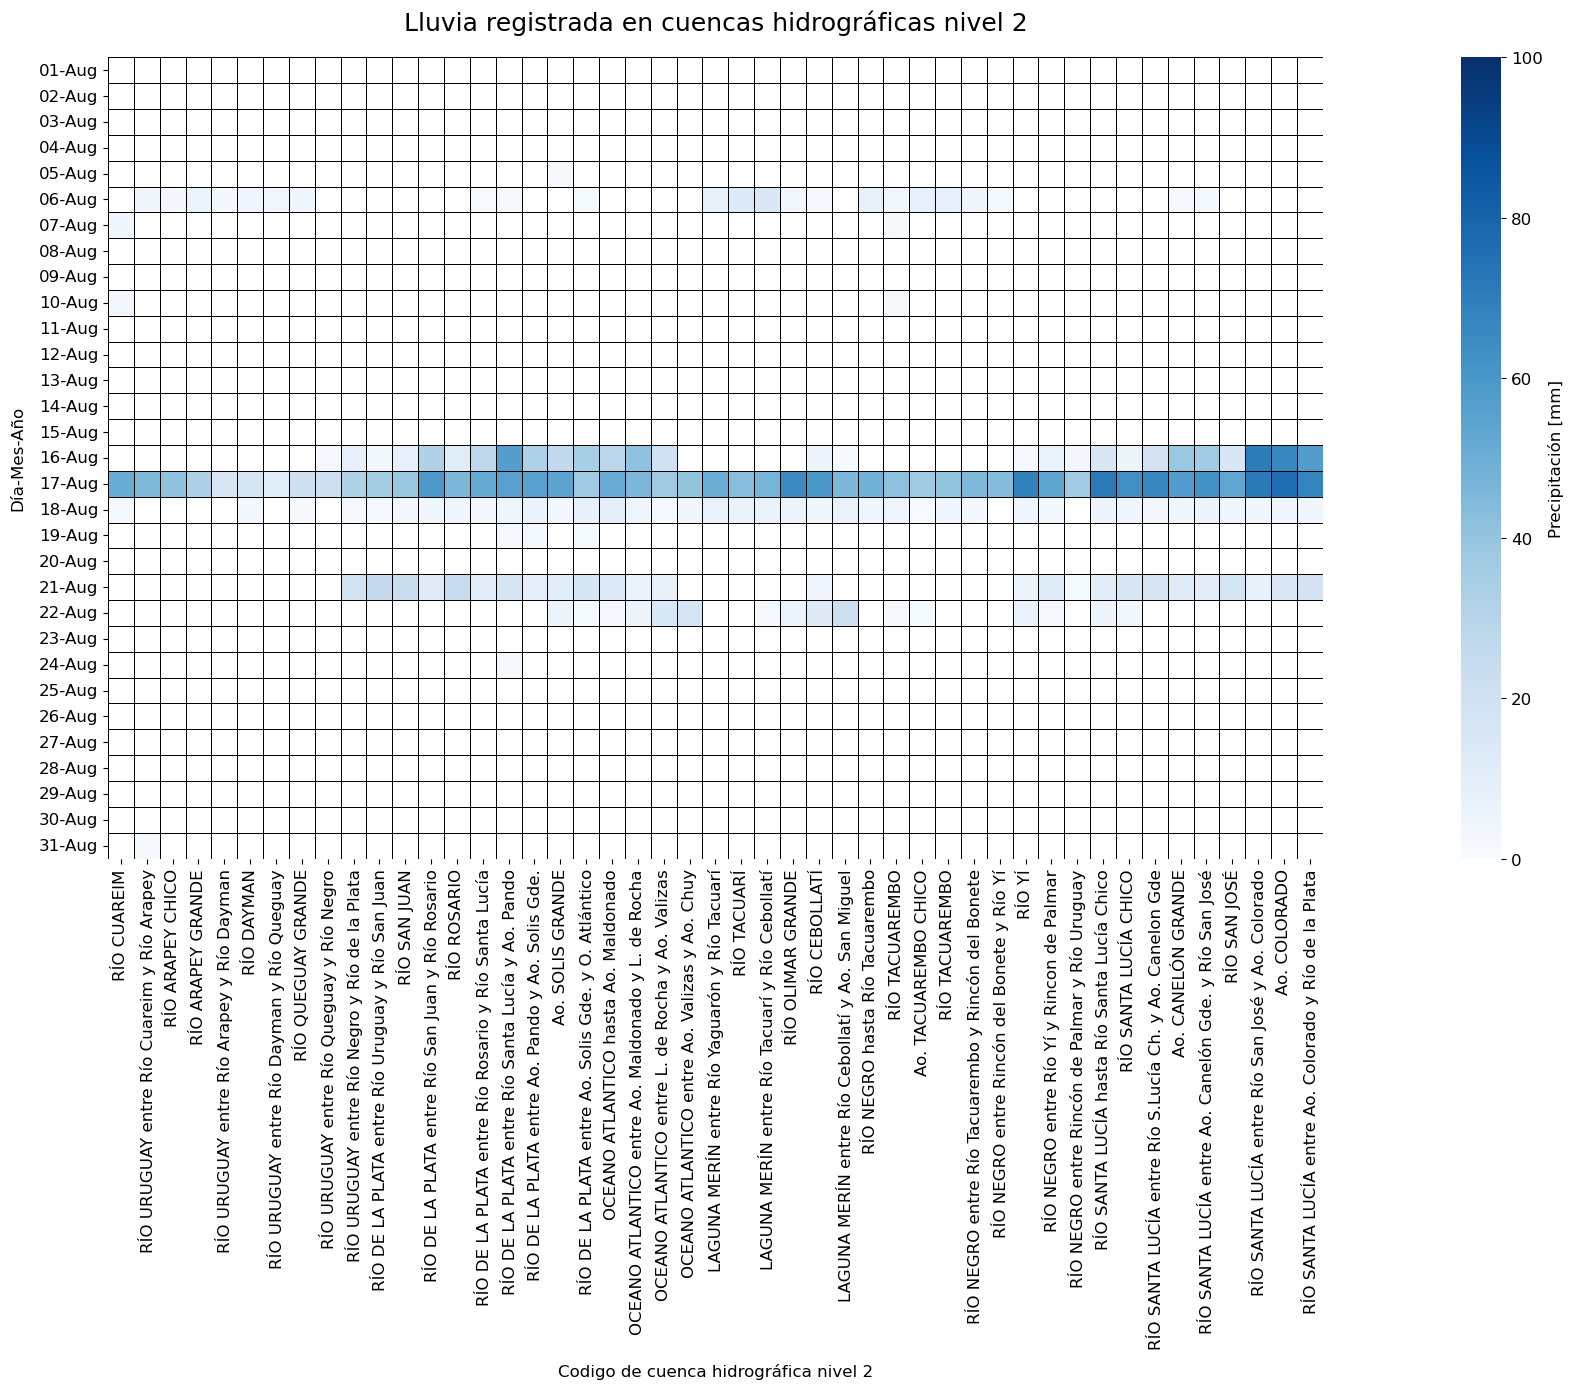

In [11]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

ax.set_xticklabels(allbasins_n2.nombre,rotation=90)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

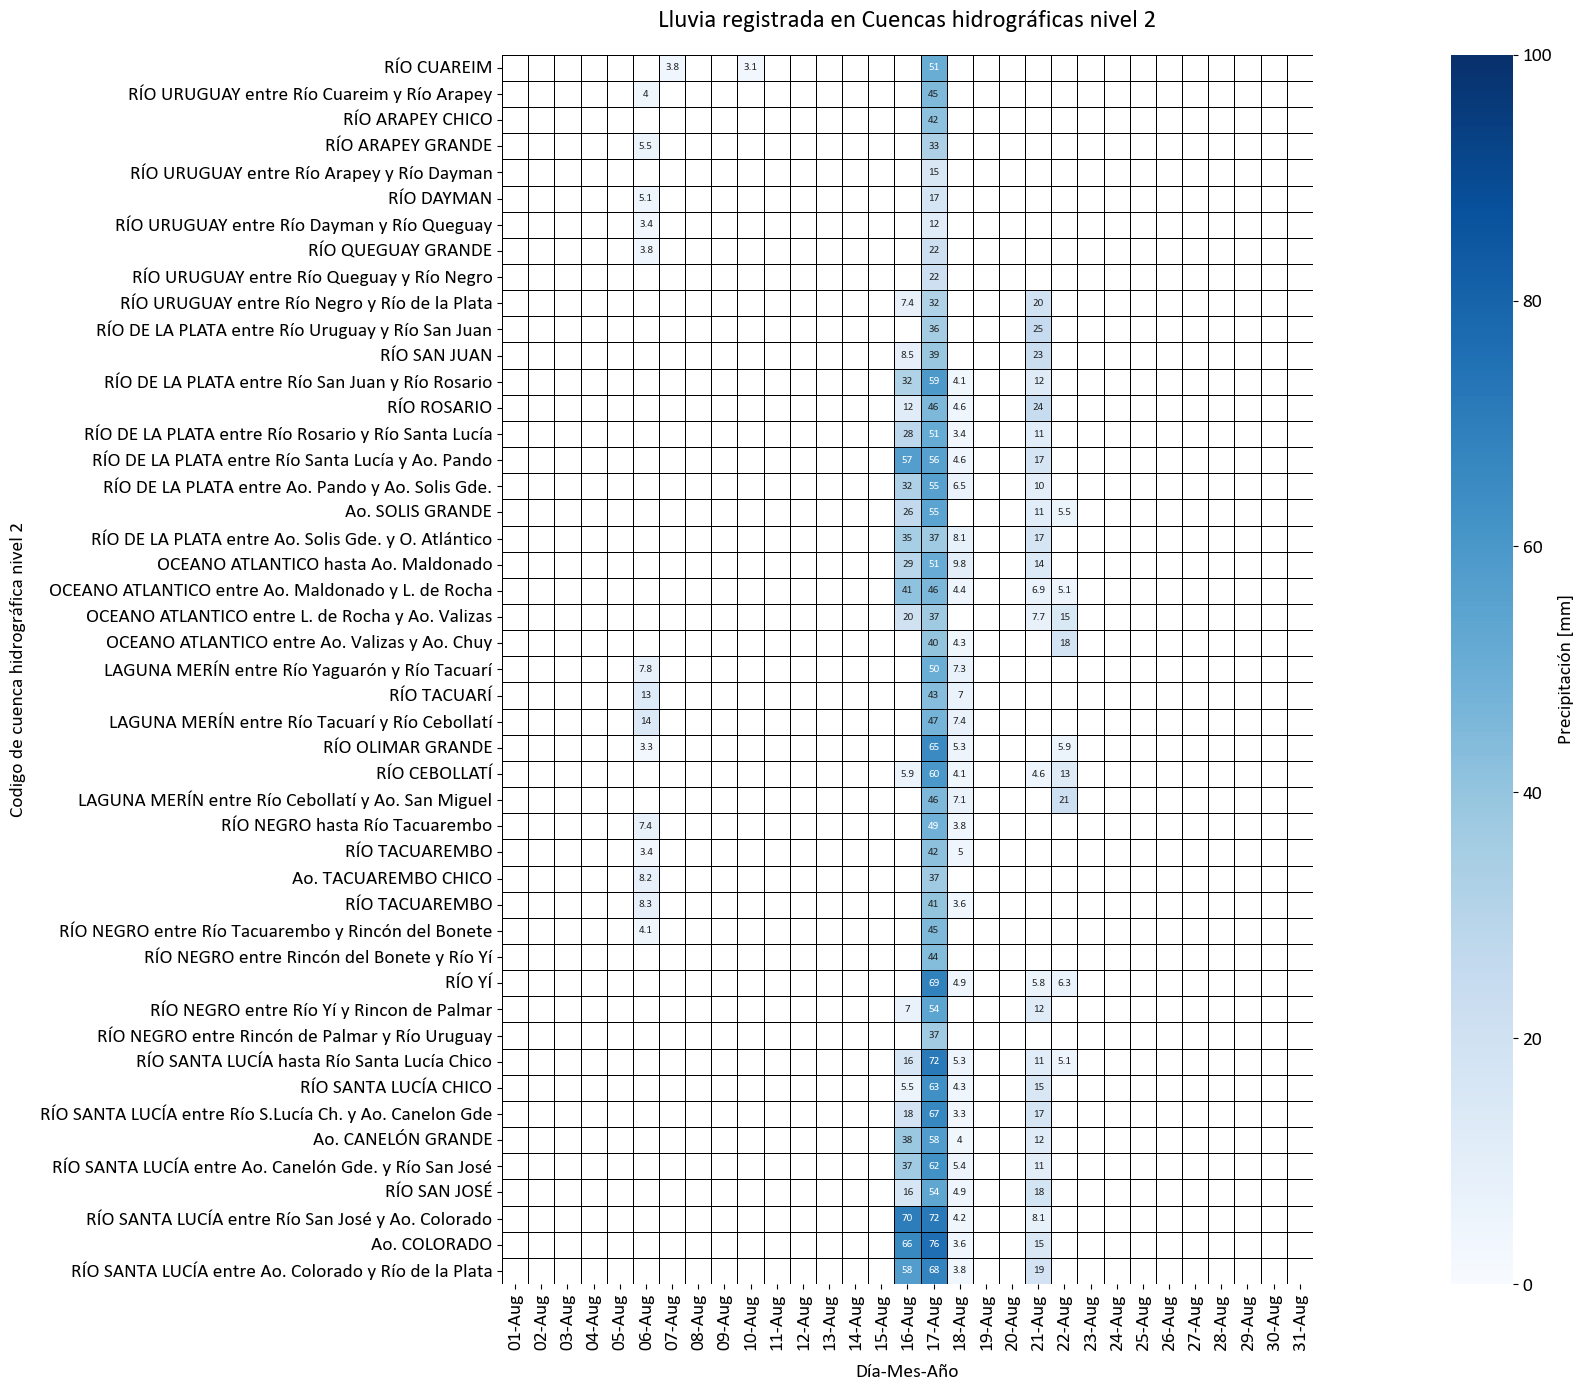

In [14]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

ax.set_yticklabels(allbasins_n2.nombre,rotation=0)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')